# Primer Examen 15%

## Ejercicio 1
El siguiente url entrega 100 artículos (ver`/work?rows=100` al final del url) de la revista con el ISSN: 1029-8479 correspondiente a "Journal of High Energy Physics" en formato JSON usando el API de CrossRef:

https://api.crossref.org/journals/1029-8479/works?rows=100

La base de datos con los 100 artículos que tambíen se puede cargar en otro DataFrame de Pandas, se encuentra anidada en la celda con fila `'items'` y columna `'messages'` la cual se puede obtener con el método `.loc['items','message']` del DataFrame original.

Obtenga la lista de DOIs para los artículos de Alessandro Strumia en esa base de datos anidada

In [18]:
#Importamos librerías 
import json
import requests
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [19]:
l = requests.get('https://api.crossref.org/journals/1029-8479/works?rows=100')
data = json.loads(l.text)

dicts = data['message']['items']

dois = []
for item in dicts:
    for author in item['author']:
        if author['given'] == 'Alessandro' and author['family'] == 'Strumia':
            dois.append(item['DOI'])

print(dois)

['10.1088/1126-6708/2000/12/016', '10.1088/1126-6708/2001/11/048']


## Ejercicio 2
2a) Genere un polinomio de numpy con 7 raices aleatorias entre 1 y 10

2b) Encuentre los puntos críticos del polinomio: las raices de la derivada el polinomio.

2c) Con alguna de los métodos para encontrar mínimos compruebe que el punto crítico de menor (mayor) valor corresponde al mínimo (máximo) global del polinomio

2d) Grafique el polinomío inclueyendo los puntos asociados a las raices.

In [22]:
#a

ra = np.random.randint(low=1, high=10, size=7)
pol = np.polynomial.polynomial.polyfromroots(ra)

print("Nuestro polinomio: ",pol[0]," + ",pol[1],"x + ",pol[2],"x^2 + ",pol[3],"x^3 + ",pol[4],"x^4 + ",pol[5],"x^5 + ",pol[6],"x^6 + ",pol[7],"x^7")
print("Nuestras raices: ",ra)

Nuestro polinomio:  -279936.0  +  353808.0 x +  -185868.0 x^2 +  52740.0 x^3 +  -8751.0 x^4 +  851.0 x^5 +  -45.0 x^6 +  1.0 x^7
Nuestras raices:  [9 3 9 4 6 8 6]


In [37]:
#b

p = np.poly1d(pol[::-1])

deriva = p.deriv()
print("Derivada del polinomio: \n",deriva)

Derivada del polinomio: 
    6       5        4           3             2
7 x - 270 x + 4255 x - 3.5e+04 x + 1.582e+05 x - 3.717e+05 x + 3.538e+05


In [38]:
raices_der = deriva.r
print("Nuestros puntos criticos: ", raices_der)

Nuestros puntos criticos:  [9.         8.43415264 7.16097061 6.         4.62676922 3.3495361 ]


In [30]:
#c

def f(x):
  return p.__call__(x)

res = optimize.minimize_scalar(f, bounds=(1, 10), method='bounded')
print(res.x)

4.626771098468283


Valor mínimo

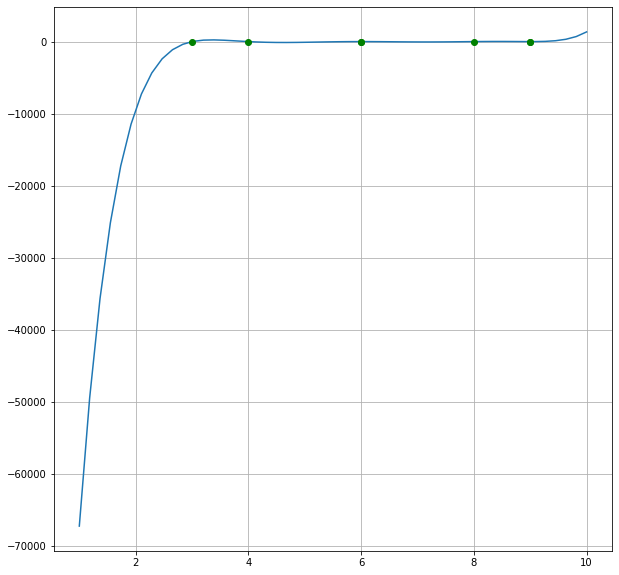

In [35]:
#d

x = np.linspace(1,10,50)

plt.figure(figsize=(10,10))
plt.plot(x,p.__call__(x))
plt.plot(ra,[0,0,0,0,0,0,0],"go")
plt.grid()
plt.show()